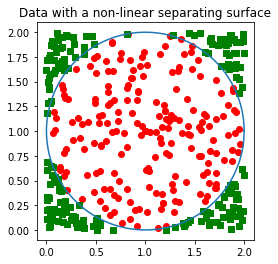

In [1]:
import numpy as np
import matplotlib.pyplot as plt
num_samples = 400

#seed the random number generator
np.random.seed(100)

X = [] 
y = [] 

radius = 1. 



center_point = np.array([1.,1.])
center_x1 = center_point[0]
center_x2 = center_point[1]

#generate points within circle (x1-1)^2 + (x2-1)^2 = 1
for i in range(int(num_samples/2)):
  toss = np.random.rand()
  x1 = np.random.uniform(low=0, high=2)  
  x2 = np.random.uniform(low=0, high=2)
  while (x1-center_x1)**2+(x2-center_x2)**2>radius:
    x1 = np.random.uniform(low=0, high=2)  
    x2 = np.random.uniform(low=0, high=2)

  #print('x1:',x1,'x2:',x2,(x1-center_x1)**2+(x2-center_x2)**2)
  X.append([x1,x2])
  y.append([1])


#generate points outside circle (x1-1)^2 + (x2-1)^2 = 1
for i in range(int(num_samples/2)):
  toss = np.random.rand()
  x1 = np.random.uniform(low=0, high=2)  
  x2 = np.random.uniform(low=0, high=2)
  while (x1-center_x1)**2+(x2-center_x2)**2<=radius:
    x1 = np.random.uniform(low=0, high=2)  
    x2 = np.random.uniform(low=0, high=2)
  
  #print('x1:',x1,'x2:',x2,(x1-center_x1)**2+(x2-center_x2)**2)
  X.append([x1,x2])
  y.append([0])




X = np.array(X)
y = np.array(y)

#print('X:',X)
#print('y:',y)

#plot the circle
angle = np.linspace(0,2*np.pi,150) 
 

 
x1 = center_x1+radius * np.cos( angle ) 
x2 = center_x2+radius * np.sin( angle ) 
 
figure, axes = plt.subplots(1) 
 
axes.plot(x1,x2)
axes.set_aspect(1) 


plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')


plt.title( 'Data with a non-linear separating surface' ) 
plt.show() 

In [2]:
#Import packages related to torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

In [3]:
# MLP Hyperparameters 
input_size = 2 
hidden_layer_1_size = 16 
hidden_layer_2_size = 128
output_size = 1
num_classes = 2
num_epochs = 2000 #num passes through data
#batch_size = 100
learning_rate = 0.001

In [4]:
class SimpleFeedFwdNet(nn.Module):

    def __init__(self):
        super(SimpleFeedFwdNet, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(input_size, hidden_layer_1_size)  # Input layer-Hidden Layer H1 
        self.fc2 = nn.Linear(hidden_layer_1_size, hidden_layer_2_size) # H1-H2 
        self.fc3 = nn.Linear(hidden_layer_2_size, output_size) #H2-output layer
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [5]:
model = SimpleFeedFwdNet()
print(model)

SimpleFeedFwdNet(
  (fc1): Linear(in_features=2, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [6]:
# Loss and optimizer
criterion = nn.BCELoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
#create X, y tensors from respective numpy arrays
tensor_x = torch.Tensor(X) # transform to torch tensor
tensor_y = torch.Tensor(y)

#Create a TensorDataset object and DataLoader object
Xy_dataset = TensorDataset(tensor_x,tensor_y) # create your dataset
dataloader = DataLoader(Xy_dataset) # create your dataloader

In [9]:
data_size = len(Xy_dataset)
print("size of Xy_dataset:", data_size)

size of Xy_dataset: 400


In [10]:
losses = [] 
for epoch in range(num_epochs):
    total_loss_epoch = 0
    for i, (x, y) in enumerate(dataloader):  
        x = x.to(device)
        y = y.to(device)

        # Forward pass
        outputs = model(x)
        loss = criterion(outputs, y)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss_epoch += loss
        #if (i+1) % 100 == 0:
            #print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{data_size}], Avg Loss: {total_loss_epoch/(i+1):.4f}')
    losses.append(total_loss_epoch)
    if epoch == 0 or (epoch+1) % 100 == 0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Epoch Avg Loss: {total_loss_epoch/(data_size):.4f}')

Epoch [1/2000], Epoch Avg Loss: 0.6631
Epoch [100/2000], Epoch Avg Loss: 0.1950
Epoch [200/2000], Epoch Avg Loss: 0.0876
Epoch [300/2000], Epoch Avg Loss: 0.0618
Epoch [400/2000], Epoch Avg Loss: 0.0505
Epoch [500/2000], Epoch Avg Loss: 0.0443
Epoch [600/2000], Epoch Avg Loss: 0.0399
Epoch [700/2000], Epoch Avg Loss: 0.0361
Epoch [800/2000], Epoch Avg Loss: 0.0327
Epoch [900/2000], Epoch Avg Loss: 0.0295
Epoch [1000/2000], Epoch Avg Loss: 0.0274
Epoch [1100/2000], Epoch Avg Loss: 0.0255
Epoch [1200/2000], Epoch Avg Loss: 0.0233
Epoch [1300/2000], Epoch Avg Loss: 0.0218
Epoch [1400/2000], Epoch Avg Loss: 0.0203
Epoch [1500/2000], Epoch Avg Loss: 0.0189
Epoch [1600/2000], Epoch Avg Loss: 0.0179
Epoch [1700/2000], Epoch Avg Loss: 0.0170
Epoch [1800/2000], Epoch Avg Loss: 0.0162
Epoch [1900/2000], Epoch Avg Loss: 0.0156
Epoch [2000/2000], Epoch Avg Loss: 0.0151


In [11]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for x,y in dataloader:
        x = x.to(device)
        y = y.to(device)
        outputs = model(x)
        predicted = 1 if outputs.data >= 0.5 else 0
        n_samples += y.size(0)
        n_correct += (predicted == y).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on train data: {acc} %')

Accuracy of the network on train data: 93.5 %


<class 'numpy.ndarray'>
(40000, 2)
torch.Size([40000, 2]) torch.Size([40000])
torch.Size([400, 2]) torch.Size([400, 1])
(40000,)


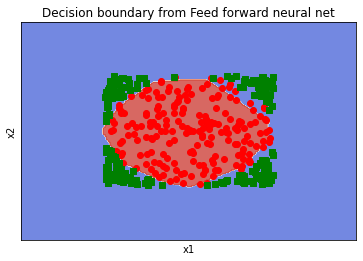

In [25]:
# # create a mesh to plot in
h=0.02 #mesh step size
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))


X_test = np.c_[xx1.ravel(), xx2.ravel()]
y_test = np.zeros(X_test.shape[0]) #dummy y 
#print(type(X_test))
#print(X_test.shape)

tensor_x_test = torch.Tensor(X_test) # transform to torch tensor
tensor_y_test = torch.Tensor(y_test)

#print(tensor_x_test.shape, tensor_y_test.shape)

#Create a TensorDataset object and DataLoader object
Xy_test_dataset = TensorDataset(tensor_x_test, tensor_y_test) # create your dataset
test_dataloader = DataLoader(Xy_test_dataset) # create your dataloader

Z = []
with torch.no_grad():
    n_samples = 0
    for x,y in test_dataloader:
        #print(x,  type(x))
        x = x.to(device)
        outputs = model(x)
        predicted = 1 if outputs.data >= 0.5 else 0
        n_samples += x.size(0)
        Z.append(predicted) 

Z = np.array(Z)
print(Z.shape)
# Z = clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# # Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
#plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
#plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xticks(())
plt.yticks(())
plt.title('Decision boundary from Feed forward neural net')
plt.show()
